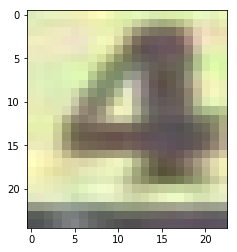

[4]


In [10]:
import keras
import numpy as np
from scipy.misc import imresize
from matplotlib import pyplot as plt

class SVHN():

    path = ""

    def __init__(self):
        self.i=1

    def get_sequence(self, image):
        A = list(self.model.predict(imresize(image,(25,23),interp='cubic').reshape((1,25,23,3))))
        return([x%10 for x in np.argmax(np.array(A).reshape((5,11)),axis=1) if x != 0])
    
    def load_model(self):
        self.model = keras.models.load_model("ioncanondprime.h5")

if __name__ == "__main__":
        S = SVHN()
        S.load_model()
        X = np.load("resizecrop.npy")[0:13000,:]
        num = np.random.randint(len(X))
        plt.imshow(X[num])
        plt.show()
        print(S.get_sequence(X[num]))

